In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


These notes are taken from reading through Kay 1993 Fundamentals of Statistical Signal Processing: Estimation Theory

### Chapter 2 Minimum Variance Unbiased Estimation

Our task is to use input/observed data to recover an estimate of an underlying parameter that generated that data. For example, we may be interesting in recovering the mean $\mu$ of a particular distribution. There are two properties that are often desirable. 

The first is that the estimator be *unbiased*. This means that the average value of our estimator is the average value of the parameter we want to estimate.

$$ 
E[\hat{\theta}] = \theta
$$

The second desirable property is that this estimator be as reliable as possible, ie that the variability around our estimate is minimal. This is where the *minimum variance* criterion comes in to play. Think about this in the limit that the variability of our estimator goes to 0 - what happens in this case? We no longer have a distribution of estimates but a single estimate, which also happens to be unbiased, meaning we have recovered the extact parameter of interest.

Ultimately, what we are interesting in is an optimal estimator, but we need to define optimal with respect to some criterion. The *minimum variance* criterion is very reasonable as the following exercise will show. 

A typical criterion for optimization is to minimize the *Mean Square Error* of an estimator:

$$
mse(\hat{\theta}) = E[(\hat{\theta}-\theta)^2]
$$

We can see, however, that minimization of this criterion leads to the following scenario. We can rewrite the MSE as follows, by subtracting and adding $E[\hat{\theta}] and then grouping within the power term:

\begin{align}
mse(\hat{\theta}) &= E\big(\big[(\hat{\theta} - E[\theta]) + (E[\theta]-\theta)\big]^2\big) \\
&= var(\hat{\theta}) + \big[E[\hat{\theta}] - \theta\big]^2
\end{align}

We can see that the MSE has two components: the variance of the estimate and the bias of the estimate. Often the bias is a function of the parameter we are trying to estimate, which leads then to an unrealizable estimator. For this reason, we restrict ourselves to the case where the bias is $0$ and try to find the *minimum variance unbiased estimator*.

There is no guaranteed way to find this estimator, but there are several candidate approaches:

1. Determine the Cramer Rao Lower Bound (CRLB) and check if an estimator satisfies it
2. Apply the Rao-Blackwell-Lehmann-Scheffe Theorem
3. Further restrict estimators to be unbiased and *linear*

### Chapter 3 Cramer Rao Lower Bound

**Estimator Accuracy Considerations**

First of all, all of the information we have to work with is contained in the observed data and the underlying PDF that generated the data. The more strongly the PDF depends on the parameter we are trying to estimate, the easier it will generally be to estimate that parameter from the observed data. 

In cases such as this we are dealing with the *likelihood function* representation of a PDF. Normally a PDF shows the probability of a particular data value given certain parameters. However, in the likelihood function view, we see the PDF as a function of our unknown parameter. 

In the figure below on the left titled Prob X, we show the probability of x given our Parameter of interest $mu$. The "sharpness" of this plot, determines how well we can estimate the value of our parameter of interest. In fact, the negative of the second derivative of the log of the likelihood function serves as a way to quantify this sharpness. (On the right plot we see the Log Prob of X.)

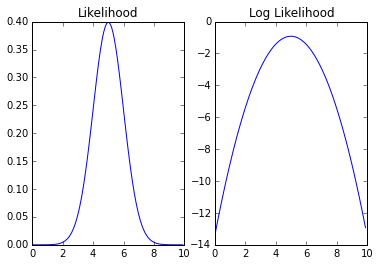

In [16]:
sig2 = 1
x = arange(0, 10, .1)
p_x = (1/sqrt(2*pi*sig2))*exp(-(x-5)**2/(2*sig2)) # This is not written strictly as a likelihood function but the resulting graph can function as such
ln_px = -log(sqrt(2*pi*sig2)) - (1/(2*sig2)*(x-5)**2)
f, ax = subplots(1,2)
ax[0].plot(x, p_x)
ax[0].set_title('Likelihood')
ax[1].plot(x, ln_px)
ax[1].set_title('Log Likelihood')


To see this, note that the negative of the second derivative of the log likelihood function is determined as follows:

\begin{align}
ln p(x;\mu) &= -ln \sqrt{2\pi\sigma^2} - \frac{1}{2\sigma^2}(x - \mu)^2 \\
\frac{\partial ln p(x;\mu)}{\partial \mu} &= \frac{1}{\sigma^2}(x - \mu) \\
-\frac{\partial^2 ln p(x;\mu)}{\partial \mu^2} &= \frac{1}{\sigma^2}
\end{align}

What happens as $\sigma^2$ increases? The "sharpness" goes to zero, meaning our estimate converges to a particular value. Thus, this appears to be a reasonable measure of how well we can estimate our parameter of interest. In many instances, however, this second derivative will depend on our observed data. We want a "sharpness" indicator that is robust to this, so we take the average or expected value of the second derivative to give: 

$$
-E\Big[\frac{\partial^2 ln p(x; \theta)}{\partial \theta^2}\Big]
$$

where I have switched to $\theta$ as a more general representation of a parameter of interest.

**Cramer Rao Lower Bound**

In light of the above discussion we can now present the CRLB.

If the regularity condition:

$$
E\Big[\frac{\partial ln p(x; \theta)}{\partial \theta}\Big] = 0 
$$

is met for all $\theta$, then the variance for an unbiased estimator satisfies:

$$
var(\hat{\theta}) \geq \frac{1}{-E\Big[\frac{\partial^2 ln p(x; \theta)}{\partial \theta^2}\Big]} = \frac{1}{I(\theta)}.
$$

Further, an estimator that attains the bound for all $\theta$ satisfies:

$$
\frac{\partial ln p(x; \theta)}{\partial \theta} = I(\theta)(g(x) - \theta)
$$

and is equal to $g(x)$.